In [1]:
# Magic
%matplotlib inline

# Libraries in use
import sys
import math
import numpy as np
import pandas as pd
from sklearn import linear_model
from matplotlib import collections  as mc

# My libraries
sys.path.append('../infra/')
from AssetsData import AssetsData
from VizualExperiment import VizualExperiment

### Build predictions

In [2]:
# Read the data
viz = VizualExperiment()
df = pd.read_csv("../data/processed_rolling_data.csv").set_index(['TIMESTAMP', 'ID'])

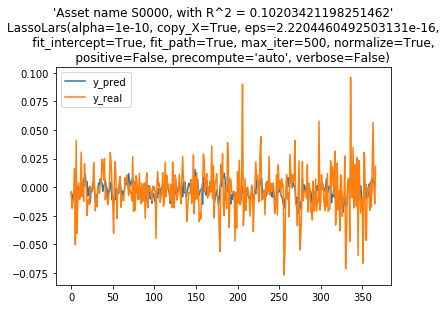

In [3]:
viz = VizualExperiment()

'''
# This loop will plot all the y_pred against y 
for name in AssetsData().get_assets_names(df):
    res = viz.plot_prediction(name, 
                              linear_model.LassoLars(alpha=1e-10),
                              df)
'''
res = viz.plot_prediction('S0000',
                          linear_model.LassoLars(alpha=1e-10),
                          df)